# HW1: LeNet-5 with Post-training Quantization and Quantization Aware Training
[LeNet](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf) is considered to be the first ConvNet.
We are going to implement a neural architecture similar to LeNet and train it with [MNIST](https://en.wikipedia.org/wiki/MNIST_database) dataset.

Before we start, you may check this [Tensorspace-LeNet](https://tensorspace.org/html/playground/lenet.html) to play with LeNet and get familiar with this neural architecture.

![image](https://production-media.paperswithcode.com/methods/LeNet_Original_Image_48T74Lc.jpg)
Ref.: LeCun et al., Gradient-Based Learning Applied to Document Recognition, 1998a

<font color='red'>Name: 劉俊廷 Student ID: 111501502 </font> 

In [ ]:
#!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 1. Initial Setup

We are goint to implement and train this nerual network with PyTorch 
If you are not familer with PyTorch, check [official tutorail](https://pytorch.org/tutorials/beginner/basics/intro.html)

**Reminder:** set the runtime type to "GPU", or your code will run much more slowly on a CPU.

In [ ]:
import torch
import torchvision
from torch import nn
from torchvision import transforms
from torch import optim
from torch.utils.data import DataLoader
import numpy as np
import random
SEED = 0
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = torch.device("cuda:0" if torch.cpu.is_available() else "cpu")
print(device)

cuda:0


### 1.1 Load dataset
Load training and test data from the MNIST dataset.

In [ ]:
def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)

g = torch.Generator()
g.manual_seed(0)

transform = transforms.Compose(
    [
     transforms.Resize((32, 32)),
     transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))
    ])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2,
                                          worker_init_fn=seed_worker, generator=g,)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=8,
                                         shuffle=False, num_workers=2,
                                         worker_init_fn=seed_worker, generator=g,)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



### 1.2 Define the Neural Network 
Define a simple CNN that classifies MNIST images.

In [ ]:
from collections import OrderedDict
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Sequential(OrderedDict([
            ('conv', nn.Conv2d(1, 6, 5, bias=False)),
            ('relu', nn.ReLU()),
        ]))
        
        self.maxpool2 = nn.Sequential(OrderedDict([
            ('pool', nn.MaxPool2d(kernel_size=(2, 2), stride=2))
        ]))
        
        self.conv3 = nn.Sequential(OrderedDict([
            ('conv', nn.Conv2d(6, 16, 5, bias=False)),
            ('relu', nn.ReLU())
        ]))
        
        self.maxpool4 = nn.Sequential(OrderedDict([
            ('pool', nn.MaxPool2d(kernel_size=(2, 2), stride=2))
        ]))
        
        self.conv5 = nn.Sequential(OrderedDict([
            ('conv', nn.Conv2d(16, 120, 5, bias=False)),
            ('relu', nn.ReLU())
        ]))
        
        self.fc6 = nn.Sequential(OrderedDict([
            ('fc', nn.Linear(120, 84, bias=False)),
            ('relu', nn.ReLU())
        ]))
        
        self.output = nn.Sequential(OrderedDict([
            ('fc', nn.Linear(84, 10, bias=False)),
        ]))
        

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.conv1(x)
        x = self.maxpool2(x)
        x = self.conv3(x)
        x = self.maxpool4(x)
        x = self.conv5(x)
        x = torch.flatten(x, 1)
        x = self.fc6(x)
        x = self.output(x)
        return x

NET = Net().to(device)

### 1.3 Question: Profile the Neural Architecture by TorchInfo
Torchinfo provides information complementary to what is provided by print(your_model) in PyTorch, similar to Tensorflow's model.summary() API to view the visualization of the model, which is helpful while debugging your network. Check this [link](https://github.com/TylerYep/torchinfo#how-to-use) about how to use TorchInfo by `summary()` and fill in the TODO in the following cell. You should get the result similar to the table below:

```
==========================================================================================
Layer (type:depth-idx)                   Output Shape              Param #
==========================================================================================
LeNet                                    --                        --
...
...
==========================================================================================
Total params: ...
...
Estimated Total Size (MB): ...
==========================================================================================
```


Ref.: https://github.com/TylerYep/torchinfo

Please read *B. LeNet-5* in the [original paper](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf) and answer the following questions.
1. What is the type (convolution, pooling, fully-connected layer, etc.), input activation size, output activation size, and activation function (if any) of each layer?
2. What is the difference part between this neural architecture and the lenet-5 in the [original paper](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf)?
3. Could we replace the 3rd conv, the conv in conv5, with a fully connected layer?

### 1.3 Answers
<font color='red'>Write your answers here.</font>
1. C1 layer: convolution, <br />
Input activation size (channel, width, height) = (1, 32, 32)  
Output activation size (channel, width, height) = (6, 28, 28)  
Activation function = relu <br />
S2 layer：Subsampling, <br />
Input activation size (channel, width, height) = (6, 28, 28)  
Output activation size (channel, width, height) = (6, 14, 14)  
Activation function = none <br />
C3 layer：convolution,<br /> 
Input activation size (channel, width, height) = (6, 14, 14)  
Output activation size (channel, width, height) = (16, 10, 10)  
Activation function = relu <br />
S4 layer：Subsampling, <br />
Input activation size (channel, width, height) = (16, 10, 10) <br />
Output activation size (channel, width, height) = (16, 5, 5)  
Activation function = none <br />
C5 layer：convolution, <br />
Input activation size (channel, width, height) = (16, 5, 5)  
Output activation size (channel, width, height) = (120, 1, 1)  
Activation function = relu <br />
F6 layer：fully-connected, <br />
Input activation size (channel, width, height)) = (120, 1, 1)  
Output activation size (output) = (84)  
Activation function = relu<br /> 
Output layer：Guassuan Connection, <br />
Input activation size (output) = (84,1,1)  
Output activation size (output) = (10,1,1)  
Activation function = linear <br />
                                                     
2. The architecture of this homework replaced the "subsampling layers" in LeNet-5 with "maxpooling layers", and the "activation function" in the homework was replaced with a "ReLu function".
3. No. If the LeNet-5 input size become bigger and fix others，the feature map size will bigger than 1*1.

In [ ]:
from torchinfo import summary
# TODO
batch_size = 4
summary(NET, input_size=(4,1,32,32), verbose=0)



Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [4, 10]                   --
├─Sequential: 1-1                        [4, 6, 28, 28]            --
│    └─Conv2d: 2-1                       [4, 6, 28, 28]            150
│    └─ReLU: 2-2                         [4, 6, 28, 28]            --
├─Sequential: 1-2                        [4, 6, 14, 14]            --
│    └─MaxPool2d: 2-3                    [4, 6, 14, 14]            --
├─Sequential: 1-3                        [4, 16, 10, 10]           --
│    └─Conv2d: 2-4                       [4, 16, 10, 10]           2,400
│    └─ReLU: 2-5                         [4, 16, 10, 10]           --
├─Sequential: 1-4                        [4, 16, 5, 5]             --
│    └─MaxPool2d: 2-6                    [4, 16, 5, 5]             --
├─Sequential: 1-5                        [4, 120, 1, 1]            --
│    └─Conv2d: 2-7                       [4, 120, 1, 1]            48,000
│    └─

### 1.4 Train and Test the Neural Network
Train this CNN on the training dataset (this may take a few moments).
* Check how to save and load the model
    * https://pytorch.org/tutorials/beginner/saving_loading_models.html
    * Save:
        ```
        torch.save(model.state_dict(), PATH)
        ```
    * Load:
        ```
        model = TheModelClass(*args, **kwargs)
        model.load_state_dict(torch.load(PATH))
        model.eval()
        ```
* After training the model, we will save it as `lenet.pt`.
* You should comment out `train(NET, trainloader, 2)` and uncomment `NET.load_state_dict(torch.load('lenet.pt'))` before submitting your homework.
    * Also, reloading the model from `lenet.pt` can save your time if there is something wrong and you need to restart and run all.

In [ ]:
def train(model: nn.Module, dataloader: DataLoader, num_epoch):
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(num_epoch):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(dataloader):
            
            inputs, labels = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                    (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0
        print(test(model, testloader, None))
    print('Finished Training')
    
def test(model: nn.Module, dataloader: DataLoader, max_samples=None, device=device) -> float:
    correct = 0
    total = 0
    n_inferences = 0

    with torch.no_grad():
        for data in dataloader:
            
            inputs, labels = data[0].to(device), data[1].to(device)

            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            if max_samples:
                n_inferences += inputs.shape[0]
                if n_inferences > max_samples:
                    break
    
    return 100 * correct / total

In [ ]:
#train(NET, trainloader, 2)
# NET.load_state_dict(torch.load('lenet.pt')) 原本ta就註解掉了
score = test(NET, testloader, None)
print('Accuracy of the network on the test images: {}%'.format(score))

torch.save(NET.state_dict(), 'lenet.pt')

[1,  2000] loss: 0.060
[1,  4000] loss: 0.062
[1,  6000] loss: 0.065
[1,  8000] loss: 0.054
[1, 10000] loss: 0.058
[1, 12000] loss: 0.053
[1, 14000] loss: 0.061
97.99
[2,  2000] loss: 0.041
[2,  4000] loss: 0.046
[2,  6000] loss: 0.054
[2,  8000] loss: 0.044
[2, 10000] loss: 0.057
[2, 12000] loss: 0.056
[2, 14000] loss: 0.046
98.69
Finished Training
Accuracy of the network on the test images: 98.69%


In [ ]:
from copy import deepcopy

# A convenience function which we use to copy CNNs
def copy_model(model: nn.Module) -> nn.Module:
    result = deepcopy(model)

    # Copy over the extra metadata we've collected which copy.deepcopy doesn't capture
    if hasattr(model, 'input_activations'):
        result.input_activations = deepcopy(model.input_activations)

    for result_layer, original_layer in zip(result.modules(), model.modules()):
        if isinstance(result_layer, (nn.Conv2d, nn.Linear)):
            if hasattr(original_layer.weight, 'scale'):
                result_layer.weight.scale = deepcopy(original_layer.weight.scale)
            
        if hasattr(original_layer, 'inAct'):
            result_layer.inAct = deepcopy(original_layer.inAct)
        if hasattr(original_layer, 'outAct'):
            result_layer.outAct = deepcopy(original_layer.outAct)
        if hasattr(original_layer, 'output_scale'):
            result_layer.output_scale = deepcopy(original_layer.output_scale)

    return result

## 2. Post-training Quantization
### 2.1 Question: Visualize Weights

We have flattened all vector for you by `tensor.view(-1)`.

Try plotting a histogram of each weight and show the total range and 3-sigma range for each weight.

hint: `np.histogram()` and `plt.hist()`

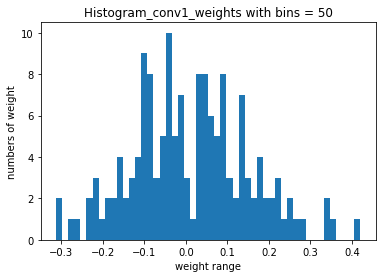

For conv1 layer, the total range [Min , Max] = [-0.3126382529735565 , 0.4205809533596039]
For conv1 layer, the 3-sigma range = [-0.4110677242279053 , 0.4324403405189514]


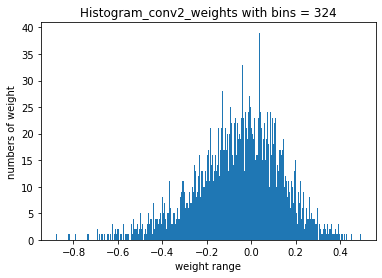

For conv2 layer, the total range [Min , Max] = [-0.8779252171516418 , 0.4926808476448059]
For conv2 layer, the 3-sigma range = [-0.6489301323890686 , 0.5345986485481262]


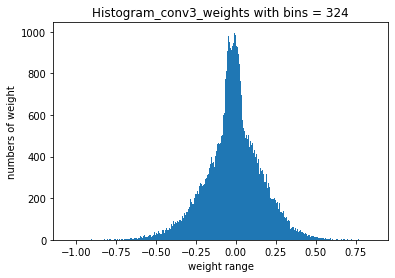

For conv3 layer, the total range [Min , Max] = [-1.0463873147964478 , 0.8583561778068542]
For conv3 layer, the 3-sigma range  = [-0.5496482253074646 , 0.5186673998832703]


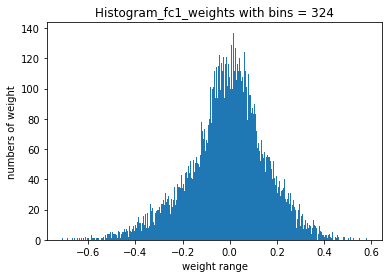

For fc1 layer, the total range [Min , Max] = [-0.7089919447898865 , 0.5807523727416992]
For fc1 layer, the 3-sigma range  = [-0.5007722973823547 , 0.48278531432151794]


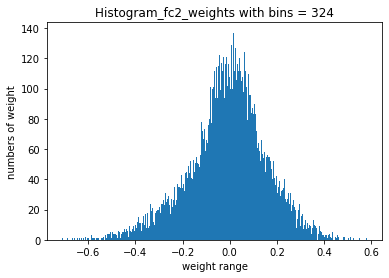

For fc2 layer, the total range [Min , Max] = [-1.4360097646713257 , 0.2286263406276703]
For fc2 layer, the 3-sigma range  = [-1.0488132238388062 , 0.5802807807922363]


In [ ]:
import matplotlib.pyplot as plt

conv1_weights = NET.conv1[0].weight.data.cpu().view(-1)
conv2_weights = NET.conv3[0].weight.data.cpu().view(-1)
conv3_weights = NET.conv5[0].weight.data.cpu().view(-1)
fc1_weights = NET.fc6[0].weight.data.cpu().view(-1)
fc2_weights = NET.output[0].weight.data.cpu().view(-1)

weightDict = {
    'conv1_weights':conv1_weights, 
    'conv2_weights': conv2_weights, 
    'conv3_weights': conv3_weights, 
    'fc1_weights': fc1_weights, 
    'fc2_weights':fc2_weights
}

# TODO
# use np.histogram() and plt.hist() to show total range and three-sigma
hist_conv1, bins_conv1 = np.histogram(conv1_weights, bins=50)
plt.hist(bins_conv1[:-1], bins_conv1, weights=hist_conv1)
plt.xlabel("weight range")
plt.ylabel("numbers of weight")
plt.title("Histogram_conv1_weights with bins = 50") 
plt.show()

conv1_weight_min = min(conv1_weights)
conv1_weight_max = max(conv1_weights)
print("For conv1 layer, the total range [Min , Max] = [{} , {}]"
.format(conv1_weight_min, conv1_weight_max))

conv1_weight_avg = torch.mean(conv1_weights)
conv1_weight_std = torch.std(conv1_weights)
print("For conv1 layer, the 3-sigma range = [{} , {}]"
.format(conv1_weight_avg-3*conv1_weight_std, conv1_weight_avg+3*conv1_weight_std))

#STEP 2
hist_conv2, bins_conv2 = np.histogram(conv2_weights, bins=324)
plt.hist(bins_conv2[:-1], bins_conv2, weights=hist_conv2)
plt.xlabel("weight range")
plt.ylabel("numbers of weight")
plt.title("Histogram_conv2_weights with bins = 324") 
plt.show()

conv2_weight_min = min(conv2_weights)
conv2_weight_max = max(conv2_weights)
print("For conv2 layer, the total range [Min , Max] = [{} , {}]"
.format(conv2_weight_min, conv2_weight_max))

conv2_weight_avg = torch.mean(conv2_weights)
conv2_weight_std = torch.std(conv2_weights)
print("For conv2 layer, the 3-sigma range = [{} , {}]"
.format(conv2_weight_avg-3*conv2_weight_std, conv2_weight_avg+3*conv2_weight_std))

#STEP 3
hist_conv3, bins_conv3 = np.histogram(conv3_weights, bins=324)
plt.hist(bins_conv3[:-1], bins_conv3, weights=hist_conv3)
plt.xlabel("weight range")
plt.ylabel("numbers of weight")
plt.title("Histogram_conv3_weights with bins = 324") 
plt.show()

conv3_weight_min = min(conv3_weights)
conv3_weight_max = max(conv3_weights)
print("For conv3 layer, the total range [Min , Max] = [{} , {}]".format(conv3_weight_min, conv3_weight_max))

conv3_weight_avg = torch.mean(conv3_weights)
conv3_weight_std = torch.std(conv3_weights)
print("For conv3 layer, the 3-sigma range  = [{} , {}]"
.format(conv3_weight_avg-3*conv3_weight_std, conv3_weight_avg+3*conv3_weight_std))

#STEP 4
hist_fc1, bins_fc1 = np.histogram(fc1_weights, bins=324)
plt.hist(bins_fc1[:-1], bins_fc1, weights=hist_fc1)
plt.xlabel("weight range")
plt.ylabel("numbers of weight")
plt.title("Histogram_fc1_weights with bins = 324") 
plt.show()

#FC fully connected
fc1_weight_min = min(fc1_weights)
fc1_weight_max = max(fc1_weights)
print("For fc1 layer, the total range [Min , Max] = [{} , {}]".format(fc1_weight_min, fc1_weight_max))

fc1_weight_avg = torch.mean(fc1_weights)
fc1_weight_std = torch.std(fc1_weights)
print("For fc1 layer, the 3-sigma range  = [{} , {}]".format(fc1_weight_avg-3*fc1_weight_std, fc1_weight_avg+3*fc1_weight_std))

#STEP 5
hist_fc2, bins_fc2 = np.histogram(fc1_weights, bins=324)
plt.hist(bins_fc2[:-1], bins_fc2, weights=hist_fc2)
plt.xlabel("weight range")
plt.ylabel("numbers of weight")
plt.title("Histogram_fc2_weights with bins = 324") 
plt.show()
#FC
fc2_weight_min = min(fc2_weights)
fc2_weight_max = max(fc2_weights)
print("For fc2 layer, the total range [Min , Max] = [{} , {}]".format(fc2_weight_min, fc2_weight_max))

fc2_weight_avg = torch.mean(fc2_weights)
fc2_weight_std = torch.std(fc2_weights)
print("For fc2 layer, the 3-sigma range  = [{} , {}]".format(fc2_weight_avg-3*fc2_weight_std, fc2_weight_avg+3*fc2_weight_std))

### 2.2 Question:  Quantize Weights
Computation of convolution or fully-connected layer can be expressed as
$$W\times I = O$$
where $W$ is the weight tensor, $I$ is the input tensor, and $O$ is the output tensor.
Let $n_w$ be the scaling factor. We have $$W_q\times I =n_w W \times I\approx n_w O$$ where $W_q$ is the quantized 8-bit signed integer weight tensor.

Fill in the TODO in `quantized_weights()`.If you’ve done everything correctly, the accuracy degradation should be negligible.
1. What is $n_w$? Explain how you get it.
2. What is the accuracy degradation? \
Show both relative error and absolute error when the true value is the accuracy we get before performing any quanitzion.

### 2.2 Answers
<font color='red'>Write your answers here.</font>
1. $n_w$ is the scaling factor. Used for quantizing weight tensor. Since we will need to adopt the symmetric quantization by the total range. So the rmax will be max(abs(weights.max()), abs(weight.min())). Then, the rmin will be -rmax. By applying the formula we can get scale = (rmax-rmin)/(2^8-1)=(rmax-rmin)/255. <br /> Also need to notify that the scale have to multiply with the weight. And the difference between the above formula and the formula in class material is that $n_w$ = 1/scale.
2. Relative error: 98.69%-98.65% = 0.04%; <br />absolute error: (98.65-98.69)/98.69 = 0.04%
<br />PS: 助教講的跟網路上定義相反，我原本是寫網路上的方法，然後後來透過宇騫問您relative error和abs error定義的同學，改成助教說的方法~(如果需要可以附上圖)


In [ ]:
net_q2 = copy_model(NET)

In [ ]:
from typing import Tuple

def quantized_weights(weights: torch.Tensor) -> Tuple[torch.Tensor, float]:
    '''
    Quantize the weights so that all values are integers between -128 and 127.
    Use the total range when deciding just what factors to scale the float32 
    values by.

    Parameters:
    weights (Tensor): The unquantized weights

    Returns:
    (Tensor, float): A tuple with the following elements:
        * The weights in quantized form, where every value is an integer between -128 and 127.
          The "dtype" will still be "float", but the values themselves should all be integers.
        * The scaling factor that your weights were multiplied by.
          This value does not need to be an 8-bit integer.
    '''

    # TODO
    # Adopt the symmetric quantization by the total range
    # weights : means the unquantized weights
    #method 1 
     #rmax = torch.max(weights)
     #rmin = -rmax
     #scale = (rmax-rmin)/255 
     #result = (weights/scale).round()  
     #return torch.clamp(result, min=-128, max=127), 1/scale
    #method 2
    tensor_shape = weights.shape
    weight_float = weights.view(-1)
    weight_max = max(weight_float)
    weight_min = min(weight_float)
    #condition need to consider
    if weight_max.abs() > weight_min.abs():
        max_abs = weight_max
    else:
        max_abs = weight_min.abs()
    scaling_factor = (255)/(2*max_abs)
    weight_float = (scaling_factor*weight_float).round()
    #
    for index, w in enumerate(weight_float):
        if w > 127:
            weight_float[index] = 127
        elif w < -128:
            weight_float[index] = -128
    # weight_float = weight_float.clamp(min=-128, max=127)
    weights = weight_float.view(tensor_shape)

    return weights, scaling_factor

In [ ]:
def quantize_layer_weights(model: nn.Module):
    for layer in model.modules():
        if isinstance(layer, (nn.Conv2d, nn.Linear)):
            q_layer_data, scale = quantized_weights(layer.weight.data)
            q_layer_data = q_layer_data.to(device)

            layer.weight.data = q_layer_data
            layer.weight.scale = scale

            if (q_layer_data < -128).any() or (q_layer_data > 127).any():
                raise Exception(
                "Quantized weights of {} layer include values out of bounds for an 8-bit signed integer".format(layer.__class__.__name__))
            if (q_layer_data != q_layer_data.round()).any():
                raise Exception(
                "Quantized weights of {} layer include non-integer values".format(layer.__class__.__name__))

quantize_layer_weights(net_q2)

In [ ]:
score = test(net_q2, testloader) 
print('Accuracy of the network after quantizing all weights: {}%'.format(score)) 

Accuracy of the network after quantizing all weights: 98.65%


### 2.3 Question: Visualize Activations
Plot histograms of the input images and the output activations of each operation and answer the following questions.
1. Discuss any observations about the distribution of these activations.
2. Record the range of the values, as well as their 3-sigma range (the difference between μ + 3σ and μ − 3σ).

### 2.3 Answers
<font color='red'>Write your answers here.</font>
1. 
&emsp;Except for the final output layer, the distribution values ​​of the output (input) activations of each layer probably fall between -1 to 2.  <br /> &emsp;Since the dynamic range of each activation is very small. If we use FP-32 to represent it, a lot of unnecessary computing burden will be added to the hardware. <br /> &emsp;I think it is very suitable to map the value of each layer to [-128, 127]. Use INT-8 operations to improve efficiency when implementing hardware later. <br />&emsp;Also, it will pass through a layer of Fully Connected Layer in the end and the number of outputs of this layer is 10. So it can be seen on the last output_activation graph that the values ​​on the vertical axis of the histogram add up to exactly 10 which is as excepted.
2. To record the range of the values and their 3-sigma range (the difference between μ + 3σ and μ − 3σ). <br />I Divide into six part.<br />
(1)Input_activations: <br />
For input_activations, the total range [Min , Max] = [-1.0 , 0.984]<br />
For input_activations, the 3-sigma range = [-2.484 , 1.038]<br />
(2)Conv1_output_activations:<br />
For conv1_output_activations, the total range [Min , Max] = [0.0 , 2.042]<br />
For conv1_output_activations, the 3-sigma range = [-0.737 , 0.990]<br />
(3)Conv3_output_activations:<br />
For conv3_output_activations, the total range [Min , Max] = [0.0 , 4.996]<br />
For conv3_output_activations, the 3-sigma range = [-1.224 , 1.443]<br />
(4)Conv5_output_activations:<br />
For conv5_output_activations, the total range [Min , Max] = [0.0 , 9.077]<br />
For conv5_output_activations, the 3-sigma range = [-4.604 , 5.681]<br />
(5)Fc6_output_activations:<br />
For fc6_output_activations, the total range [Min , Max] = [0.0 , 8.770]<br />
For fc6_output_activations, the 3-sigma range = [-4.696 , 6.783]<br />
(6)Output_output_activations:<br />
For output_output_activations, the total range [Min , Max] = [-35.356 , 1.471]<br />
For output_output_activations, the 3-sigma range = [-51.455 , 10.807]<br />



In [ ]:
net_q3 = copy_model(NET)

def visualize_activations(module, input, output):
    if module.profile_activations is True:
        module.inAct = input[0].cpu().reshape(-1)
        module.outAct = output[0].cpu().reshape(-1)
    
for name, model in net_q3.named_children():
    print("{}\n [register_forward_hook]: {}".format(name, model))
    model.profile_activations = True
    model.register_forward_hook(visualize_activations)
net_q3.eval()
with torch.no_grad():
    input = trainset[0][0].unsqueeze(0)
    _ = net_q3(input.to(device))   
for name, model in net_q3.named_children(): 
    model.profile_activations = False 

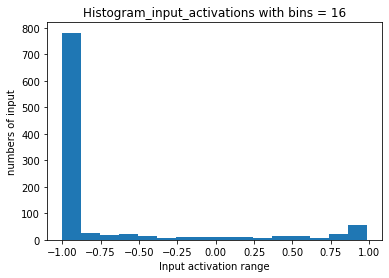

For input_activations, the total range [Min , Max] = [-1.0 , 0.9843137264251709]
For input_activations, the 3-sigma range = [-2.484403610229492 , 1.0379424095153809]


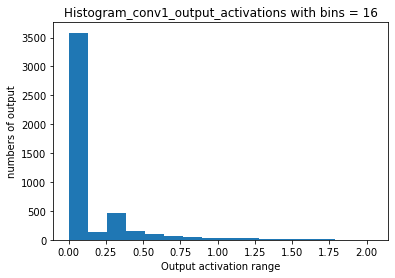

For conv1_output_activations, the total range [Min , Max] = [0.0 , 2.0422251224517822]
For conv1_output_activations, the 3-sigma range = [-0.7370423674583435 , 0.9904592633247375]


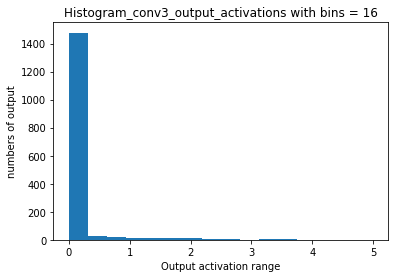

For conv3_output_activations, the total range [Min , Max] = [0.0 , 4.995591163635254]
For conv3_output_activations, the 3-sigma range = [-1.2242180109024048 , 1.4439336061477661]


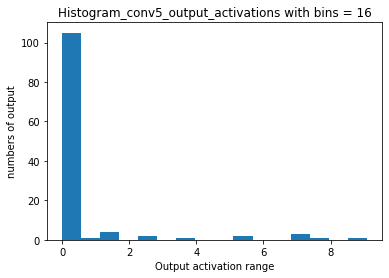

For conv5_output_activations, the total range [Min , Max] = [0.0 , 9.076972007751465]
For conv5_output_activations, the 3-sigma range = [-4.603542327880859 , 5.680952072143555]


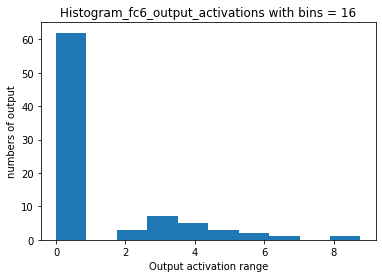

For fc6_output_activations, the total range [Min , Max] = [0.0 , 8.770421981811523]
For fc6_output_activations, the 3-sigma range = [-4.696049213409424 , 6.783362865447998]


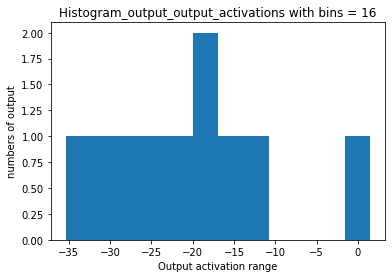

For output_output_activations, the total range [Min , Max] = [-35.35569763183594 , 1.4714858531951904]
For output_output_activations, the 3-sigma range = [-51.45478820800781 , 10.807010650634766]


In [ ]:
input_activations = net_q3.conv1.inAct
conv1_output_activations = net_q3.conv1.outAct
conv3_output_activations = net_q3.conv3.outAct
conv5_output_activations = net_q3.conv5.outAct
fc6_output_activations = net_q3.fc6.outAct
output_output_activations = net_q3.output.outAct

actDict = {
    'input_activations':input_activations, 
    'conv1_output_activations':conv1_output_activations, 
    'conv3_output_activations':conv3_output_activations, 
    'conv5_output_activations':conv5_output_activations, 
    'fc6_output_activations':fc6_output_activations, 
    'output_output_activations':output_output_activations
}

# TODO
hist_output, bins_output = np.histogram(input_activations, bins=16)
plt.hist(bins_output[:-1], bins_output, weights=hist_output)
plt.xlabel("Input activation range")
plt.ylabel("numbers of input")
plt.title("Histogram_input_activations with bins = 16") 
plt.show()

input_activations_min = min(input_activations)
input_activations_max = max(input_activations)
print("For input_activations, the total range [Min , Max] = [{} , {}]".format(input_activations_min, input_activations_max))

input_activations_avg = torch.mean(input_activations)
input_activations_std = torch.std(input_activations)
print("For input_activations, the 3-sigma range = [{} , {}]".format(input_activations_avg-3*input_activations_std, input_activations_avg+3*input_activations_std))

#Conv1
hist_conv1, bins_conv1 = np.histogram(conv1_output_activations, bins=16)
plt.hist(bins_conv1[:-1], bins_conv1, weights=hist_conv1)
plt.xlabel("Output activation range")
plt.ylabel("numbers of output")
plt.title("Histogram_conv1_output_activations with bins = 16") 
plt.show()

conv1_output_activations_min = min(conv1_output_activations)
conv1_output_activations_max = max(conv1_output_activations)
print("For conv1_output_activations, the total range [Min , Max] = [{} , {}]".format(conv1_output_activations_min, conv1_output_activations_max))

conv1_output_activations_avg = torch.mean(conv1_output_activations)
conv1_output_activations_std = torch.std(conv1_output_activations)
print("For conv1_output_activations, the 3-sigma range = [{} , {}]"
        .format(conv1_output_activations_avg-3*conv1_output_activations_std, conv1_output_activations_avg+3*conv1_output_activations_std))
#Conv3
hist_conv3, bins_conv3 = np.histogram(conv3_output_activations, bins=16)
plt.hist(bins_conv3[:-1], bins_conv3, weights=hist_conv3)
plt.xlabel("Output activation range")
plt.ylabel("numbers of output")
plt.title("Histogram_conv3_output_activations with bins = 16") 
plt.show()

conv3_output_activations_min = min(conv3_output_activations)
conv3_output_activations_max = max(conv3_output_activations)
print("For conv3_output_activations, the total range [Min , Max] = [{} , {}]".format(conv3_output_activations_min, conv3_output_activations_max))

conv3_output_activations_avg = torch.mean(conv3_output_activations)
conv3_output_activations_std = torch.std(conv3_output_activations)
print("For conv3_output_activations, the 3-sigma range = [{} , {}]".format(conv3_output_activations_avg-3*conv3_output_activations_std, conv3_output_activations_avg+3*conv3_output_activations_std))

#Conv5
hist_conv5, bins_conv5 = np.histogram(conv5_output_activations, bins=16)
plt.hist(bins_conv5[:-1], bins_conv5, weights=hist_conv5)
plt.xlabel("Output activation range")
plt.ylabel("numbers of output")
plt.title("Histogram_conv5_output_activations with bins = 16") 
plt.show()

conv5_output_activations_min = min(conv5_output_activations)
conv5_output_activations_max = max(conv5_output_activations)
print("For conv5_output_activations, the total range [Min , Max] = [{} , {}]".format(conv5_output_activations_min, conv5_output_activations_max))

conv5_output_activations_avg = torch.mean(conv5_output_activations)
conv5_output_activations_std = torch.std(conv5_output_activations)
print("For conv5_output_activations, the 3-sigma range = [{} , {}]".format(conv5_output_activations_avg-3*conv5_output_activations_std, conv5_output_activations_avg+3*conv5_output_activations_std))

#FC6
hist_fc6, bins_fc6 = np.histogram(fc6_output_activations, bins=10)
plt.hist(bins_fc6[:-1], bins_fc6, weights=hist_fc6)
plt.xlabel("Output activation range")
plt.ylabel("numbers of output")
plt.title("Histogram_fc6_output_activations with bins = 16") 
plt.show()

fc6_output_activations_min = min(fc6_output_activations)
fc6_output_activations_max = max(fc6_output_activations)
print("For fc6_output_activations, the total range [Min , Max] = [{} , {}]".format(fc6_output_activations_min, fc6_output_activations_max))

fc6_output_activations_avg = torch.mean(fc6_output_activations)
fc6_output_activations_std = torch.std(fc6_output_activations)
print("For fc6_output_activations, the 3-sigma range = [{} , {}]"
        .format(fc6_output_activations_avg-3*fc6_output_activations_std, fc6_output_activations_avg+3*fc6_output_activations_std))
#output_output
hist_output, bins_output = np.histogram(output_output_activations, bins=12)
plt.hist(bins_output[:-1], bins_output, weights=hist_output)
plt.xlabel("Output activation range")
plt.ylabel("numbers of output")
plt.title("Histogram_output_output_activations with bins = 16") 
plt.show()

output_output_activations_min = min(output_output_activations)
output_output_activations_max = max(output_output_activations)
print("For output_output_activations, the total range [Min , Max] = [{} , {}]".format(output_output_activations_min, output_output_activations_max))

output_output_activations_avg = torch.mean(output_output_activations)
output_output_activations_std = torch.std(output_output_activations)
print("For output_output_activations, the 3-sigma range = [{} , {}]".format(output_output_activations_avg-3*output_output_activations_std, output_output_activations_avg+3*output_output_activations_std))

### 2.4 Question:  Quantize Activations
The output of conv in conv1 can be $$W_{conv1}\times I=O_{conv1}.$$
Let the scaling factor of the quantized input matrix $I$ be $n_I$, the scaling factor of the quantized weight matrix $W_{conv1}$ 
be $n_{W_{conv1}}$, and the scaling factor of the output matrix $O_{conv1}$ be $n_{O_{conv1}}$.  
$$W_{conv1_q}\times I_q = (n_{W_{conv1}}W_{conv1})\times (n_II)\approx (n_{W_{conv1}}n_I)O_{conv1}$$
where $W_{conv1_q}$ is the quantized 8-bit signed integer weight tensor and $I_q$ is the quantized 8-bit signed integer input activation tensor.

$$O_{conv1_q} \approx n_{O_{conv1}}O_{conv1}$$
where $O_{conv1_q}$ is the quantized 8-bit signed integer output activation tensor.

Since we're doing post-training quantization, we can get $n_I$, $n_{W_{conv1}}$, and $n_{O_{conv1}}$ first and do the other calculations for quantization.

As for `forward()` of `NetQuantized()`, make sure you can simulate fixed-point representation when doing any calculation with input/output scale. Keep in mind that we will implement hardware to accelerate this model with fixed-point computations.
   * In this assignment, we only "emulate" fixed-point computations. We don't need to use any fixed-point data type (e.g., `int`).
   * You will have to fill in the TODO in `forward()` to scale the outputs of each layer. Consider rounding binary fractions to the 16th place with the following steps (e.g., for output_scale): 
       1. `scale = round(scale*(2**16))`: Now, we have the `scale` rounded to the 16th place with a software trick of moving the binary point (`*(2**16)`) and applying the round function.
       2. `(scale*features) >> 16`: Move back the binary point.
        * As for scaling the initial input, you can simply perform `round(scale)*features` since `input_scale` is much greater than 1.
       3. Two options for emulating bit-shifting in fixed-point numbers instead of floating-point numbers:
        1.	`(scale*features) >> 16`. Make sure that the data type of `(scale*input features)` is **int**.
        2.	`floor((scale*features) >> 16)`
       4. Clamp the value between -128 and 127
    
    

Answer the following questions.

1. How to compute $n_I$, $n_{W_{conv1}}$, and $n_{O_{conv1}}$? 
2. The ture quantized output activation tensor is depend on $W_{conv1_q}$ and $I_q$, so we cannot simply apply only $n_{O_{conv1}}$ on the output of $W_{conv1_q}\times I_q$ to quantize output activation. \
Derive an equation for the quantized output of the conv in conv1 after quantizing activation and weight with  $n_I$, $n_{W_{conv1}}$, and $n_{O_{conv1}}$ and show the scaling factor $S_1$ of it. \
(hint: quantize $O$ in $W_{conv1_q}\times I_q = O$ and get $W_{conv1_q}\times I_q \approx S_1O = O_q$ where $O_q$ is the quantized 8-bit signed integer output.)
3. Derive an equation for the quantized output of the conv in conv3 after quantizing activation and weight.
4. Show the general equantion of each layer for calculating the scaling factor of output activation.
5. Fill in the TODO in the following code.If you’ve done everything correctly, the accuracy degradation should be negligible. What is the accuracy degradation? Show both relative error and absolute error when the true value is the accuracy we get before performing any quanitzion.

### 2.4 Answers
<font color='red'>Write your answers here.</font>
1. <br />
$$n_I= \frac{255}{2*|Input|_{max}}$$

$$n_{Wconv1} = \frac{255}{2*|Weight_{conv1}|_{max}}$$

$$n_{Oconv1} = \frac{255}{2*|Output_{conv1}|_{max}}$$
2. <br />$$W_{conv1_q}* I_q = (n_{W_{conv1}}W_{conv1})* (n_II)\approx (n_{W_{conv1}}n_I)O_{conv1}$$ <br />
    Also, $$O_{conv1_q} \approx n_{O_{conv1}}O_{conv1}$$ <br />
     Therefore, <br />
      $$S_{1} = \frac{n_{oconv1}}{nw_{conv1}*n_{I}}$$

3. <br />$$W_{con3q} * O_{conv1q} = nw_{conv3}*n_{oconv1}*W_{conv3}*O_{conv1} = nw_{conv3} * n_{oconv1} * O_{conv3}$$ <br /> 
    Also, 
$$n_{oconv3} * O_{conv3} = O_{conv3q}$$<br /> 
  Therefore, <br />$$S_{3} = \frac{n_{oconv3}}{nw_{conv3}*n_{oconv1}}.$$  <br />Since<br /> $$S_{1} = \frac{n_{oconv1}}{nw_{conv1}*n_{I}}$$ <br />$$S_{3} = \frac{n_{oconv3}}{nw_{conv1}*nw_{conv3}*S_1*n_{I}}$$
4. Let the l be the abbreviation of "layer", and $S_{l}$ means scaling factor of layer<br />
$$S_{l} = \frac{n_{oconvl}}{nw_{convl}*n_{oconv(l-1)}}$$<br />  $$S_{l-1} = \frac{n_{oconv(l-1)}}{nw_{conv(l-1)}*n_{oconv(l-2)}}$$ Therefore, $$S_{l} = \frac{n_{oconvl}}{nw_{convl}*...*nw_{conv1}*S_{l-1}*...*S_1*n_I}$$
5. Relative error: 98.65-98.65 =0 ; <br />absolute error: (98.65-98.65)/ 98.65= 0


In [ ]:
from typing import List

class NetQuantized(nn.Module):
    def __init__(self, net_with_weights_quantized: nn.Module):
        super(NetQuantized, self).__init__()
        
        net_init = copy_model(net_with_weights_quantized)

        self.conv1 = net_init.conv1
        self.maxpool2 = net_init.maxpool2
        self.conv3 = net_init.conv3
        self.maxpool4 = net_init.maxpool4
        self.conv5 = net_init.conv5
        self.fc6 = net_init.fc6
        self.output = net_init.output

        for layer in self.conv1, self.conv3, self.conv5, self.fc6, self.output:
            def pre_hook(l, x):
                x = x[0]
                if (x < -128).any() or (x > 127).any():
                    raise Exception("Input to {} layer is out of bounds for an 8-bit signed integer".format(l.__class__.__name__))
                if (x != x.round()).any():
                    raise Exception("Input to {} layer has non-integer values".format(l.__class__.__name__))
            layer.register_forward_pre_hook(pre_hook)

        # Calculate the scaling factor for the initial input to the CNN
        self.input_activations = net_with_weights_quantized.conv1.inAct
        self.input_scale = NetQuantized.quantize_initial_input(self.input_activations)
        print(self.input_scale) #debug

        # Calculate the output scaling factors for all the layers of the CNN
        preceding_layer_scales = []
        for layer in self.conv1, self.conv3, self.conv5, self.fc6, self.output:
            layer.output_scale = NetQuantized.quantize_activations(layer.outAct, layer[0].weight.scale, self.input_scale, preceding_layer_scales)
            preceding_layer_scales.append((layer[0].weight.scale, layer.output_scale))
    @staticmethod
    def quantize_initial_input(pixels: np.ndarray) -> float:
        '''
        Calculate a scaling factor for the images that are input to the first layer of the CNN.

        Parameters:
        pixels (ndarray): The values of all the pixels which were part of the input image during training

        Returns:
        float: A scaling factor that the input should be multiplied by before being fed into the first layer.
               This value does not need to be an 8-bit integer.
        '''
    
        # TODO 1
        # use scaling_factor 
        # declare input_activation_max & input_activation_min
        input_activation_max = pixels.max()
        input_activation_min = pixels.min()
        # abs if-else condition
        if input_activation_max > abs(input_activation_min):
            max_abs=input_activation_max
        else:
            max_abs=abs(input_activation_min)
        scaling_factor = (255)/(2*max_abs)
        #print('TODO 1 Before: {}'.format(1/scaling_factor))
        #print('After: {}' .format(((1/scaling_factor)*(2**16)).round()))
        return scaling_factor
        #return 1              
        #return scaling_factor   
        
    @staticmethod
    def quantize_activations(activations: np.ndarray, n_w: float, n_initial_input: float, n_s: List[Tuple[float, float]]) -> float:
        '''
        Calculate a scaling factor to multiply the output of a layer by.

        Parameters:
        activations (ndarray): The values of all the pixels which have been output by this layer during training
        n_w (float): The scale by which the weights of this layer were multiplied as part of the "quantize_weights" function you wrote earlier
        n_initial_input (float): The scale by which the initial input to the neural network was multiplied
        n_s ([(float, float)]): A list of tuples, where each tuple represents the "weight scale" and "output scale" (in that order) for every preceding layer

        Returns:
        float: A scaling factor that the layer output should be multiplied by before being fed into the first layer.
               This value does not need to be an 8-bit integer.
        '''
        # TODO 2
        # use scaling_factor 
        # declare output_activation_max & output_activation_min
        output_activation_max = activations.max() 
        output_activation_min = activations.min()
        # If-else condition
        if output_activation_max > abs(output_activation_min):
            max_abs= output_activation_max
        else:
            max_abs= abs(output_activation_min)
        n_oa = (255)/(2*max_abs)

        list_len = len(n_s)
        if list_len != 0:
            for i in range(list_len):
                for j in range(2):
                    n_initial_input = n_s[i][j]*n_initial_input
        result2 = n_oa/(n_w*n_initial_input)
        
        #print('TODO2 Before: {}'.format(result2))
        #print(n_initial_input)
        #print('TODO2 After: {}' .format((result*(2**16)).round()))       
        
        return result2
        # TODO2 END

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        '''
        Since input_scale is 128 and all output_scales are less than 1, we should keep input_scale as it is and tranform output_scale to 
        round(1/output_scale) to ease the verilog implementaion.
        
        Also, the normalized input images is a matrix with lots of floating numbers. We can transform x*input_scale to
        input_scale/round(1/x)
        
        To not implement rounding in verilog, we use floor when doing other calculations with input/output_scale.
        '''
        
        # TODO 3
        # PyTorch tensor x，代表一筆訓練數據的特徵值。輸出 also a PyTorch tensor，
        # to represent through CNN result
        #'rshift'操作是用於將二進制表示的數值向右移動指定位數。僅支持整數，對於如浮點數，會出現上述錯誤。
        x = (self.input_scale*x).floor()
        x = x.clamp(min=-128, max=127)
        x = self.conv1(x)
        
        conv1_output_scale = (self.conv1.output_scale*(2**16)).round()
        #print("conv1_output_scale*x: (befor, after) = ({}, {})".format(
        #    self.conv1.output_scale, conv1_output_scale))
        x = ((conv1_output_scale*x) / 2**16).floor()
        x = x.clamp(min=-128, max=127)
        x = self.maxpool2(x)
        x = self.conv3(x)

        conv3_output_scale = (self.conv3.output_scale*(2**16)).round()
        x = ((conv3_output_scale*x) / 2**16).floor()
        x = x.clamp(min=-128, max=127)
        x = self.maxpool4(x)
        x = self.conv5(x)

        conv5_output_scale = (self.conv5.output_scale*(2**16)).round()
        x = ((conv5_output_scale*x) / 2**16).floor()
        x = x.clamp(min=-128, max=127)
        x = torch.flatten(x, 1)
        x = self.fc6(x)

        fc6_output_scale = (self.fc6.output_scale*(2**16)).round()
        x = ((fc6_output_scale*x) / 2**16).floor()
        x = x.clamp(min=-128, max=127)
        x = self.output(x)

        output_output_scale = (self.output.output_scale*(2**16)).round()
        x = ((output_output_scale*x) / 2**16).floor()
        x = x.clamp(min=-128, max=127)
        '''
        # TODO 3 Used for debug
        print("conv1_output_scale: (befor, after) = ({}, {})".format(
            self.conv1.output_scale, conv1_output_scale))
        print("conv3_output_scale: (befor, after) = ({}, {})".format(
            self.conv3.output_scale, conv3_output_scale))
        print("conv5_output_scale: (befor, after) = ({}, {})".format(
            self.conv5.output_scale, conv5_output_scale))
        print("fc6_output_scale: (befor, after) = ({}, {})".format(
            self.fc6.output_scale, fc6_output_scale))
        print("output_output_scale: (befor, after) = ({}, {})".format(
            self.output.output_scale, output_output_scale))
        #'rshift'操作是用於將二進制表示的數值向右移動指定位數。僅支持整數，對於如浮點數，會出現上述錯誤。
        '''
        return x

In [ ]:
net_init = copy_model(net_q2)
net_init.input_activations = deepcopy(net_q3.conv1.inAct)
        
for layer_init, layer_q3 in zip(net_init.children(), net_q3.children()):
    layer_init.inAct = deepcopy(layer_q3.inAct)
    layer_init.outAct = deepcopy(layer_q3.outAct)

net_quantized = NetQuantized(net_init)

tensor(127.5000)


In [ ]:
score = test(net_quantized, testloader)
print('Accuracy of the network after quantizing both weights and activations: {}%'.format(score))

Accuracy of the network after quantizing both weights and activations: 98.65%


Answer the following questions.(hint: please consider verilog implementation):

6. What is the benefit of using `floor`?
7. What is the benefit of replacing `x*output_scale`with `x/round(1/output_scale)`?

### 2.4 Answers
<font color='red'>Write your answers here.</font>
6. &emsp;The purpose of using the floor function is to round down floating-point numbers and convert them to integers. <br /> &emsp;In Verilog implementation, it is necessary to convert floating-point numbers to integers before performing calculations let hardware easy to design. If a floating-point number is directly converted to an integer, it can result in loss of precision and introduce errors.  <br /> &emsp;Using the floor function ensures that the resulting integer is the closest integer to the original floating-point number, and it does not introduce any loss of precision or errors. 
7. &emsp;Replacing x*output_scale with x/round(1/output_scale) in verilog may simplify the scaling operation's implementation. Due to original one need multiplication which is cost more time than  division.
<br /> &emsp;By using division instead, the scaling operation's implementation can be made more efficient. Also, round the inverse of the output scale ensures accurate scaling without any loss of precision or errors that could result from using a floating-point number.

In [ ]:
print("input_scale:\n", net_quantized.input_scale.item())
print("output_scale:\n {}\n {}\n {}\n {}\n {}".format(
    net_quantized.conv1.output_scale.item(),
    net_quantized.conv3.output_scale.item(),
    net_quantized.conv5.output_scale.item(),
    net_quantized.fc6.output_scale.item(),
    net_quantized.output.output_scale.item()
))

print("input_scale:\n", net_quantized.input_scale.item())
print("output_scale:\n {}\n {}\n {}\n {}\n {}".format(
    round(1/net_quantized.conv1.output_scale.item()),
    round(1/net_quantized.conv3.output_scale.item()),
    round(1/net_quantized.conv5.output_scale.item()),
    round(1/net_quantized.fc6.output_scale.item()),
    round(1/net_quantized.output.output_scale.item())
))

input_scale:
 127.5
output_scale:
 0.0016152352327480912
 0.0028149071149528027
 0.004516771994531155
 0.005755083169788122
 0.002793883439153433
input_scale:
 127.5
output_scale:
 619
 355
 221
 174
 358


### 2.5 Question:  Quantize Biases
We add a bias in the final layer of this LeNet.
* You should comment out `train(NET_WITH_BIAS, trainloader, 2)` and uncomment `NET_WITH_BIAS.load_state_dict(torch.load('lenet_with_bias.pt'))` before submitting your homework.
    * Also, reloading the model from `lenet_with_bias.pt` can save your time if there is something wrong and you need to restart and run all.

Answer the following questions.
1. Now the equation is $$W*I+\beta = O$$ where $\beta$ is the bias. Derive the equation of a quantized layer with bias.\
Note that our biases are commonly quantized to 32-bits
2. What is the scaling factor for the bias?\
(hint: the form looks just like what we have done for quantizing activations)
3. Fill in the TODO in the following code.If you’ve done everything correctly, the accuracy degradation should be negligible. What is the accuracy degradation?\
Show both relative error and absolute error when the true value is the accuracy we get before performing any quanitzion.

### 2.5 Answers
<font color='red'>Write your answers here.</font>
1. $$W*I+\beta = O$$ 
Note that 
$$W = \frac{W_q}{n_W}$$ 
$$I = \frac{I_q}{n_I}$$
and 
$$O = \frac{O_q}{n_O}$$ 

Therefore, the original formula 
$$W*I+\beta = O$$ can be written as 
$$\frac{W_q}{n_W}*\frac{I_q}{n_I}+\beta = \frac{O_q}{n_O}$$ 
2. $$n_O\frac{W_q}{n_W}*\frac{I_q}{n_I}+n_O\beta = O_q$$
Finally, so we get the scale of the bias will be
$n_O$. By above, we get the formula 
$$S_{l} = \frac{n_{ocl}}{nw_{cl}*...*nw_{c1}*S_{l-1}*...*S_1*n_I}$$ replace the $n_O$ in bias scale with $S_l$ formula.
As the result, the scale can be represent as $$nw_{cl}*...*nw_{c1}*S_{l}*...*S_1*n_I$$
3. (a)Accuracy of the network (with a bias) on the test images & all the weights are quantized but the bias isn't Relative error: 98.64%-98.66% = -0.02%; absolute error: (98.66-98.64)/98.64 = 0.02% (b)Accuracy of the network (with a bias) on the test images & all the weights and the bias are quantized Relative error: 98.64%-98.63% = 0.01%; absolute error: (98.63-98.64)/98.64 = 0.01%<br />PS: 助教講的跟網路上定義相反，我原本是寫網路上的方法，然後後來透過宇騫問您relative error和abs error定義的同學，改成助教說的方法~(如果需要可以附上圖)

In [ ]:
class NetWithBias(Net):
    def __init__(self):
        super(NetWithBias, self).__init__()

        self.output = nn.Sequential(OrderedDict([
            ('fc', nn.Linear(84, 10, bias=True)),
        ]))
    
NET_WITH_BIAS = NetWithBias().to(device)

In [ ]:
#train(NET_WITH_BIAS, trainloader, 2)
NET_WITH_BIAS.load_state_dict(torch.load('lenet_with_bias.pt'))
score = test(NET_WITH_BIAS, testloader)
print('Accuracy of the network (with a bias) on the test images: {}%'.format(score))
torch.save(NET_WITH_BIAS.state_dict(), 'lenet_with_bias.pt')

Accuracy of the network (with a bias) on the test images: 98.64%


In [ ]:
for name, model in NET_WITH_BIAS.named_children():
    print("{}\n [register_forward_hook]: {}".format(name, model))
    model.profile_activations = True
    model.register_forward_hook(visualize_activations)
NET_WITH_BIAS.eval()
with torch.no_grad():
    input = trainset[0][0].unsqueeze(0)
    _ = NET_WITH_BIAS(input.to(device))
for name, model in NET_WITH_BIAS.named_children(): model.profile_activations = False 

conv1
 [register_forward_hook]: Sequential(
  (conv): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), bias=False)
  (relu): ReLU()
)
maxpool2
 [register_forward_hook]: Sequential(
  (pool): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
)
conv3
 [register_forward_hook]: Sequential(
  (conv): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1), bias=False)
  (relu): ReLU()
)
maxpool4
 [register_forward_hook]: Sequential(
  (pool): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
)
conv5
 [register_forward_hook]: Sequential(
  (conv): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1), bias=False)
  (relu): ReLU()
)
fc6
 [register_forward_hook]: Sequential(
  (fc): Linear(in_features=120, out_features=84, bias=False)
  (relu): ReLU()
)
output
 [register_forward_hook]: Sequential(
  (fc): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
net_with_bias_with_quantized_weights = copy_model(NET_WITH_BIAS)
quantize_layer_weights(net_with_bias_with_quantized_weights)

score = test(net_with_bias_with_quantized_weights, testloader)
print('Accuracy of the network on the test images after all the weights are quantized but the bias isn\'t: {}%'.format(score))

Accuracy of the network on the test images after all the weights are quantized but the bias isn't: 98.66%


In [ ]:
class NetQuantizedWithBias(NetQuantized):
    def __init__(self, net_with_weights_quantized: nn.Module):
        super(NetQuantizedWithBias, self).__init__(net_with_weights_quantized)
        preceding_scales = [
            (self.conv1[0].weight.scale, self.conv1.output_scale),
            (self.conv3[0].weight.scale, self.conv3.output_scale),
            (self.conv5[0].weight.scale, self.conv5.output_scale),
            (self.fc6[0].weight.scale, self.fc6.output_scale),
            (self.output[0].weight.scale, self.output.output_scale)
        ][:-1]
        
        self.output[0].bias.data = NetQuantizedWithBias.quantized_bias(
            self.output[0].bias.data,
            self.output[0].weight.scale,
            self.input_scale,
            preceding_scales
        )

        if (self.output[0].bias.data < -2147483648).any() or (self.output[0].bias.data > 2147483647).any():
            raise Exception("Bias has values which are out of bounds for an 32-bit signed integer")
        if (self.output[0].bias.data != self.output[0].bias.data.round()).any():
            raise Exception("Bias has non-integer values")

    @staticmethod
    def quantized_bias(bias: torch.Tensor, n_w: float, n_initial_input: float, n_s: List[Tuple[float, float]]) -> torch.Tensor:
        '''
        Quantize the bias so that all values are integers between -2147483648 and 2147483647.
        
        Parameters:
        bias (Tensor): The floating point values of the bias
        n_w (float): The scale by which the weights of this layer were multiplied
        n_initial_input (float): The scale by which the initial input to the neural network was multiplied
        n_s ([(float, float)]): A list of tuples, where each tuple represents the "weight scale" and "output scale" (in that order) for every preceding layer

        Returns:
        Tensor: The bias in quantized form, where every value is an integer between -2147483648 and 2147483647.
                The "dtype" will still be "float", but the values themselves should all be integers.
        '''

        # TODO
        scale = n_initial_input * n_w.data.cpu()
        for weights_scale, output_scale in n_s:
            scale *= weights_scale.data.cpu() * output_scale.cpu()

        
        return torch.clamp((bias * scale).round(), min=-2147483648, max=2147483647)

In [ ]:
net_quantized_with_bias = NetQuantizedWithBias(net_with_bias_with_quantized_weights)

tensor(127.5000)


In [ ]:
score = test(net_quantized_with_bias, testloader)
print('Accuracy of the network on the test images after all the weights and the bias are quantized: {}%'.format(score))

Accuracy of the network on the test images after all the weights and the bias are quantized: 98.63%


## 3. Quantization Aware Training (QAT)
* You should comment out `train(model_fp32_prepared, trainloader, 2)` and uncomment `model_fp32_prepared.load_state_dict(torch.load('model_fp32_prepared.pt'))` before submitting your homework.
    * Also, reloading the model from `model_fp32_prepared.pt` can save your time if there is something wrong and you need to restart and run all.

### 3.1 Question: 
Try to trace code and study the quantization-aware training (QAT) from [Quantization — PyTorch 1.13 documentation](https://pytorch.org/docs/stable/quantization.html), then answer the following question.

1. How can the QAT achieve a higher accuracy than the post-training quantization (PTQ)?
2. What does the function model_fp32_fused do to improve precision and speed?
3. Two more layers (quant, dequant) appeared after we quantized our model using the PyTorch QAT method. What do these two layers do?

### 3.1 Answers
<font color='red'>Write your answers here.</font>
1.  Quantization Aware Training (QAT) 在training時會模擬量化的結果，然而 post-training quantization (PTQ) 忽略了量化對模型訓練的準確性，導致前者的accuracy可以higher than後者。但相對來說，PTQ可節省量化訓練的時間和計算成本，且只Quantizes pre-trained model.
2. function model_fp32 則是為了改善第一小題的精度與速度，方法上是將相同量化層的操作融合成一個操作， 像是include Conv + Relu 或Conv + Batchnorm + Relu等操作，來達到減少計算時間和內存的使用的方法，並可在量化後保持更高的準確性。
3. quant, dequant layer則是為了在QAT的方法中支持量化而添加至Model裡，前者是將input tensor convert floating-point format to a quantized format；而後者是converts output tensor from the quantized format to a floating-point format，兩者目的是用來提高量化數據的準確性

In [ ]:
class QATNet(NetWithBias):
    def __init__(self):
        super().__init__()
        # QuantStub converts tensors from floating point to quantized
        self.quant = torch.quantization.QuantStub()
        # DeQuantStub converts tensors from quantized to floating point
        self.dequant = torch.quantization.DeQuantStub()

    def forward(self, x):
        x = self.quant(x)
        x = super().forward(x)
        x = self.dequant(x)
        return x
    
MODEL_FP32 = QATNet().to(device)
print(MODEL_FP32)

MODEL_FP32.eval()
print(MODEL_FP32)

MODEL_FP32.qconfig = torch.quantization.get_default_qat_qconfig('fbgemm')
MODEL_FP32_FUSED = torch.quantization.fuse_modules(MODEL_FP32,
    [['conv1.conv', 'conv1.relu'], 
     ['conv3.conv', 'conv3.relu'],
     ['conv5.conv', 'conv5.relu'],
     ['fc6.fc', 'fc6.relu'],
    ])
MODEL_FP32_FUSED = MODEL_FP32
# Specify quantization configuration
MODEL_FP32_FUSED.qconfig = torch.ao.quantization.get_default_qat_qconfig('fbgemm')
print(MODEL_FP32_FUSED.qconfig)

model_fp32_prepared = torch.quantization.prepare_qat(MODEL_FP32_FUSED.train())

#train(model_fp32_prepared, trainloader, 2)
model_fp32_prepared.load_state_dict(torch.load('model_fp32_prepared.pt'))
score = test(model_fp32_prepared, testloader)
print('Accuracy of the model_fp32_prepared: {}%'.format(score))
torch.save(model_fp32_prepared.state_dict(), 'model_fp32_prepared.pt')

QATNet(
  (conv1): Sequential(
    (conv): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), bias=False)
    (relu): ReLU()
  )
  (maxpool2): Sequential(
    (pool): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (conv): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1), bias=False)
    (relu): ReLU()
  )
  (maxpool4): Sequential(
    (pool): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv5): Sequential(
    (conv): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1), bias=False)
    (relu): ReLU()
  )
  (fc6): Sequential(
    (fc): Linear(in_features=120, out_features=84, bias=False)
    (relu): ReLU()
  )
  (output): Sequential(
    (fc): Linear(in_features=84, out_features=10, bias=True)
  )
  (quant): QuantStub()
  (dequant): DeQuantStub()
)
QATNet(
  (conv1): Sequential(
    (conv): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), bias=False)
    (relu): ReLU()
  )
  (maxpool2): Se

/usr/local/lib/python3.8/dist-packages/torch/ao/quantization/observer.py:214: UserWarning: Please use quant_min and quant_max to specify the range for observers.                     reduce_range will be deprecated in a future release of PyTorch.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torch/ao/quantization/fake_quantize.py:309: UserWarning: _aminmax is deprecated as of PyTorch 1.11 and will be removed in a future release. Use aminmax instead. This warning will only appear once per process. (Triggered internally at ../aten/src/ATen/native/ReduceAllOps.cpp:45.)
  return torch.fused_moving_avg_obs_fake_quant(
/usr/local/lib/python3.8/dist-packages/torch/ao/quantization/fake_quantize.py:309: UserWarning: _aminmax is deprecated as of PyTorch 1.11 and will be removed in a future release. Use aminmax instead. This warning will only appear once per process. (Triggered internally at ../aten/src/ATen/native/TensorCompare.cpp:568.)
  return torch.fused_moving_avg_obs_fake_quant(


[1,  2000] loss: 0.596
[1,  4000] loss: 0.134
[1,  6000] loss: 0.099
[1,  8000] loss: 0.091
[1, 10000] loss: 0.082
[1, 12000] loss: 0.085
[1, 14000] loss: 0.078
97.9
[2,  2000] loss: 0.059
[2,  4000] loss: 0.062
[2,  6000] loss: 0.066
[2,  8000] loss: 0.061
[2, 10000] loss: 0.060
[2, 12000] loss: 0.057
[2, 14000] loss: 0.057
98.08
Finished Training
Accuracy of the model_fp32_prepared: 98.07%


In [ ]:
# model_fp32_prepared

In [ ]:
model_fp32_prepared = model_fp32_prepared.to('cpu')
model_fp32_prepared.eval()
qat = torch.quantization.convert(model_fp32_prepared, inplace=False)


# Extract the input and output of the quantized model

In [ ]:
# copy the model with bias quantized model and save the weights
inference_model = copy_model(qat)

In [ ]:
# Use accuray to make sure it is same model
score = test(inference_model, testloader, None, torch.device('cpu'))
print('Accuracy of the network after quantizing both weights and activations: {}%'.format(score))

Accuracy of the network after quantizing both weights and activations: 98.08%


Use an image as an input of the activations，and choose 100 images to generate patterns for our homework 2.

In [ ]:
# random choose images as the input and get the output
np.random.seed(0)
index = np.random.randint(0,len(trainset), size=100)
index = range(100)

Save the activations of input and output to the CSV format.

In [ ]:
import os 
import zipfile
# It is easier to download all the files with zip
zf = zipfile.ZipFile('parameters.zip', 'w', zipfile.ZIP_DEFLATED)

if not os.path.exists('./activations'):
    os.mkdir('./activations')

In [ ]:
for ind in range(100):
    if not os.path.exists('./activations/img{}'.format(ind)):
        os.mkdir('./activations/img{}'.format(ind))

    for name, model in qat.named_children():
        model.profile_activations = True
        model.register_forward_hook(visualize_activations)
    input0, label = testset[index[ind]]
    input = input0.reshape(1, 1, 32, 32)
    output = qat(input)
    for name, model in qat.named_children(): model.profile_activations = False 
    

    np.savetxt('./activations/img{}/input.csv'.format(ind), input.cpu().data.numpy().reshape(-1), delimiter=',')
    np.savetxt('./activations/img{}/output.csv'.format(ind), output.cpu().data.numpy().reshape(-1).astype(int), delimiter=',')
    zf.write('./activations/img{}/input.csv'.format(ind))
    zf.write('./activations/img{}/output.csv'.format(ind))
    
    opDict = {
        'conv1': (qat.conv1.inAct, qat.conv1.outAct),
        'maxpool2': (qat.maxpool2.inAct, qat.maxpool2.outAct),
        'conv3': (qat.conv3.inAct, qat.conv3.outAct),
        'maxpool4': (qat.maxpool4.inAct, qat.maxpool4.outAct),
        'conv5': (qat.conv5.inAct, qat.conv5.outAct),
        'fc6': (qat.fc6.inAct, qat.fc6.outAct),
        'quant': (qat.quant.inAct, qat.quant.outAct),
        'dequant': (qat.dequant.inAct, qat.dequant.outAct),
        'output': (qat.output.inAct, qat.output.outAct)
    }
    
    for key in opDict:
        if not os.path.exists('./activations/img{}/{}'.format(ind, key)):
            os.mkdir('./activations/img{}/{}'.format(ind, key))
        if(opDict[key][0].type()== "torch.quantized.QInt8Tensor" or opDict[key][0].type()== "torch.quantized.QUInt8Tensor"):
            temp = opDict[key][0].cpu().int_repr()
        else:
            temp = opDict[key][0].cpu()
        if(opDict[key][1].type()== "torch.quantized.QInt8Tensor" or opDict[key][1].type()== "torch.quantized.QUInt8Tensor"):
            temp1 = opDict[key][1].cpu().int_repr()
        else:
            temp1 = opDict[key][1].cpu()                
        np.savetxt('./activations/img{}/{}/input.csv'.format(ind, key), temp.data.numpy().reshape(-1).astype(float), delimiter=',')
        np.savetxt('./activations/img{}/{}/output.csv'.format(ind, key), temp1.cpu().data.numpy().reshape(-1).astype(float), delimiter=',')
        zf.write('./activations/img{}/{}/input.csv'.format(ind, key))
        zf.write('./activations/img{}/{}/output.csv'.format(ind, key))

Save each layer's weights, zero point and scaling factor to the CSV format.

In [ ]:
if not os.path.exists('./weights'):
    os.mkdir('./weights')
# TA forgot these lines QQ
if not os.path.exists('./weights/weight'):
    os.mkdir('./weights/weight')  
if not os.path.exists('./weights/scale'):
    os.mkdir('./weights/scale')  
if not os.path.exists('./weights/zero_point'):
    os.mkdir('./weights/zero_point') 
# -----------------------------
for name, weights in qat.state_dict().items():
    name_split = name.split('.')
    if weights!= None:
        if name_split[-2] != "_packed_params":
            if(weights.type()== "torch.quantized.QInt8Tensor" or weights.type()== "torch.quantized.QUInt8Tensor"):
                np.savetxt('./weights/weight/%s.csv' %(name) , weights.cpu().int_repr().numpy().reshape(-1).astype(float), delimiter=',')
                zf.write('./weights/weight/%s.csv' %(name))

                np.savetxt('./weights/weight/%s.scale.csv' %(name) , weights.q_per_channel_scales().numpy().reshape(-1).astype(float), delimiter=',')
                zf.write('./weights/weight/%s.scale.csv' %(name))

                np.savetxt('./weights/weight/%s.zero_point.csv' %(name) , weights.q_per_channel_zero_points().cpu().numpy().reshape(-1).astype(float), delimiter=',')
                zf.write('./weights/weight/%s.zero_point.csv' %(name))
            else:
                np.savetxt('./weights/%s/%s.csv'%(name_split[-1],name) , weights.cpu().numpy().reshape(-1).astype(float), delimiter=',')
                zf.write('./weights/%s/%s.csv'%(name_split[-1],name))

          
          
        elif name_split[-1] == "_packed_params":
            if not os.path.exists('./weights/_packed_params'):
                os.mkdir('./weights/_packed_params')
            weight, bias = weights
            name = name_split[0]+"."+name_split[1]
            if(weight.type()== "torch.quantized.QInt8Tensor" or weight.type()== "torch.quantized.QUInt8Tensor"):
                np.savetxt('./weights/weight/%s.weight.csv' %(name)  , weight.cpu().int_repr().numpy().reshape(-1).astype(float), delimiter=',')
                zf.write('./weights/weight/%s.weight.csv' %(name))

                np.savetxt('./weights/weight/%s.weight.scale.csv' %(name) , weight.q_per_channel_scales().cpu().numpy().reshape(-1).astype(float), delimiter=',')
                zf.write('./weights/weight/%s.weight.scale.csv' %(name))

                np.savetxt('./weights/weight/%s.weight.zero_point.csv' %(name) , weight.q_per_channel_zero_points().cpu().numpy().reshape(-1).astype(float), delimiter=',')
                zf.write('./weights/weight/%s.weight.zero_point.csv' %(name))
            
            if bias is not None:
                
                if(bias.type()== "torch.quantized.QInt8Tensor" or bias.type()== "torch.quantized.QUInt8Tensor"):
                    np.savetxt('./weights/weight/%s.bias.csv' %(name) , bias.cpu().int_repr().numpy().reshape(-1).astype(float), delimiter=',')
                    zf.write('./weights/weight/%s.bias.csv' %(name))
                else:
                    np.savetxt('./weights/weight/%s.bias.csv' %(name) , bias.cpu().detach().numpy().reshape(-1).astype(float), delimiter=',')
                    zf.write('./weights/weight/%s.bias.csv' %(name))


Save the zip file.

In [ ]:
zf.close()